# SVM(support vector machine) 

##**What is SVM and how it works ?**



---


*The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.*

*To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane*

**Possible hyper planes**

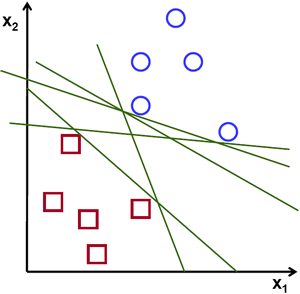

**Optimal hyper plane** 

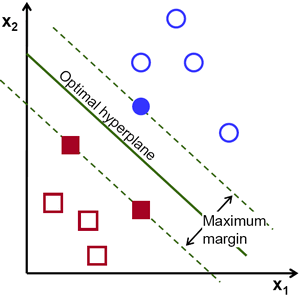





**Why the name support vector machine ? and what is a support vector ?**

*Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM*


## Importing dataset and necessary libraries

**Numpy** : *NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays*


**Pandas** : *pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series*. 

**Matplotlib :** *Matplotlib is a plotting library for the Python programming language*


In [ ]:
 import pandas as pd
 import numpy as np
 from termcolor import colored as cl # text customization
 import matplotlib.pyplot as plt # visualization


**Iris flower data set** 

*The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features we want to distinguish the species from each other*
*There are 3 species in this dataset 'Iris-setosa', 'Iris-versicolor','Iris-virginica'*



In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Iris-Dataset/master/Iris.csv')# getiing dataset from girhub repository

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*For simpliity we are removing the third class from the dataset thus make it a binary classification problem*

In [ ]:
rows = list(range(100,150))
df = df.drop(df.index[rows])

*we are replcaing the class names with 1 and -1*

In [ ]:
df=df.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[int(-1),int(1)])

## Feature selection

*Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.*

feature selection helps to reduce number of features, Fewer features is desirable because it reduces the complexity of the model and a simpler model is simpler to understand and explain.


**Pearson correlation**


 It displays the correlation coefficient between any two variables in the dataset. The correlation coefficient takes values between -1 and 1. A value of 1 indicating a very strong positive relation between the two variables, while a value of -1 indicating a very strong negative relation, and a value of 0 indicates no relation.

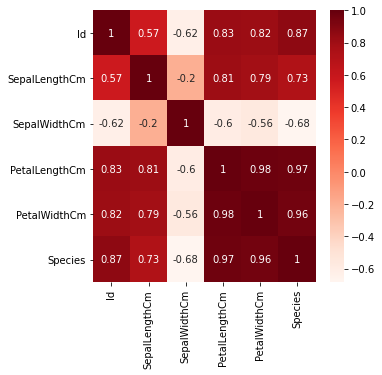

In [ ]:
plt.figure(figsize=(5,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

*first we can look at the correlation between the traget variable and features .
we can consider 0.5 as kind of thershold 
As you can see all the variables have strong correlation with target variable 
Now we look at the correlation between variables to identify dependent variables. As you can see petal length and petal width are highly correlated, so we drop one of them and take the other.Similaraly sepal length also have high correlation with these two variables so we drop that. So we take one from this three features and sepal width for training our svm*

In [ ]:
df = df.drop(['PetalLengthCm','SepalLengthCm'],axis=1)

## Splitting Data into test and train set


***Why a test and train ?***

*Test set acts as unseen data such that model is trained on training data and tested on the test set*

In [ ]:
 from sklearn.model_selection import train_test_split
# DATA SPLIT
X = df.drop('Species', axis = 1).values
Y = df['Species'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)



x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)





y_test = y_test.reshape(10,1)

## SVM implementation using Scikit-learn


*Scikit-learn is a free software machine learning library for the Python programming language.It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN*

*using scikit learn you can make a svm using just 2 lines of code*

In [ ]:
# creating and training svm 
from sklearn.svm import SVC # SVM algorithm
svm = SVC()
svm.fit(x_train, y_train)#training svm


#measuring perfomance of our SVM in test set
svm_yhat = svm.predict(x_test)#obtaining predictions for our test set 
from sklearn.metrics import accuracy_score # evaluation metric
print("SVM Scikit ")
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))




SVM Scikit 
Accuracy score of the SVM model is 1.0


## SVM From Scratch

**How SVM works ?**

*In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss*


**Hinge loss**


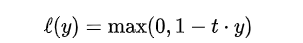



y=wx+b

where w,b are the parameters of the hyperplane and x is the input variable(s).

t =Actual label

The cost is 0 if the predicted value and the actual value are of the same sign. If they are not, we then calculate the loss value.

But that is not enough 

If (w; b) defines the optimal hyperplane, so does (αw; αb) for
every α > 0. So we need to normalize.
Rewrite the loss function
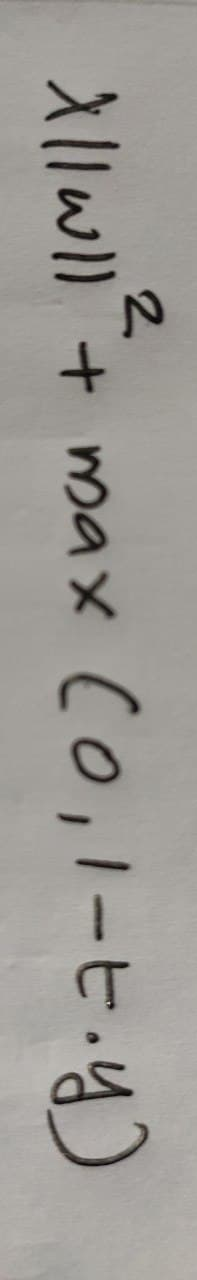

**How to reduce the loss function ?**

**Stochastic gradient descent**

Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that 


How SGD works ?


1. Find the slope of the objective function with respect to each parameter/   feature. In other words, compute the gradient of the function
1. Calculate the step sizes for each feature as : step size = gradient * learning rate
2.  Calculate the new parameters as : new params = old params -step size




if you want more insight on Stochastic gradient descent you can read the medium article using the following link [ link](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)


so if there is no missclassification our update equation will be 


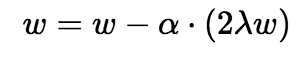

if there is missclassification our update equation will be 

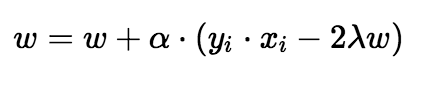

so we first find the t then multiply it with y and determine if its is correct classification or not then we update the weights


```
y_pred=w@X.T
product=y_ped@Yr

 for val in prod:
          if(val >= 1):
              cost = 0
              w = w - alpha * (2 * 1/epoch * w)
          else:
            cost = 1 - val 
            w = w + alpha * (X[count] * Y[count] - 2 * 1/epoch * w)
```



In [ ]:
class SVM(object):

    def __init__(self,lr=0.0001,epoch=10000):
        self.Param={}# dictionary for storing weight and biases
        self.lr=lr
        self.epoch=epoch 
        
    def fit(self,X,Y):
      m=X.shape[0]#number of training samples
      f=X.shape[1]#numberof features
      w=np.zeros((1,f))#for storing weights
      Y = Y.reshape(m,1)
      epoch_count=0

      epoch=self.epoch
      alpha=self.lr
      while(epoch_count<epoch):
        y_pred=w@X.T
        product=y_pred@Y
        epoch_count=epoch_count+1
        #print("Epoch count :",epoch_count)
        prod = y_pred.T * Y
        count = 0
        for val in prod:
          if(val >= 1):
              cost = 0
              w = w - alpha * (2 * 1/epoch * w)
          else:
            cost = 1 - val 
            w = w + alpha * (X[count] * Y[count] - 2 * 1/epoch * w)
          count += 1
      #save params
      self.Param['w']=w 
      #print(w)
      return 0

    def predict(self,x_test):

      
      w=self.Param['w']
      y_pred=w@x_test.T
      predictions = []

      #print(y_pred.shape)

      for val in y_pred[0]:
          if(val > 1):
              predictions.append(1)
          else:
              predictions.append(-1)
      return predictions

In [ ]:
svm=SVM()
svm.fit(x_train,y_train)
prediction = svm.predict(x_test)

**How to meassure perfomance of our model ?**

1.)Accuracy

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

2.)F1 score
The F1 score is the harmonic mean of the precision and recall
The precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.




In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 


print("SVM from scratch")
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, prediction)), attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test,prediction)), attrs = ['bold']))
 

SVM from scratch
Accuracy score of the SVM model is 1.0
F1 score of the SVM model is 1.0
